In [17]:
from numpy.random import randn
import numpy as np

# Fanin normalized random matrix generator
def rand_matrix(m, n):
   return randn(m, n) / np.sqrt(m)  # sqrt important for initialization, to have an expectation

# Create & initialize MLP from specification
def MLP(dims):
  As = []  # transformations
  Bs = []  # biases
  d = len(dims) - 1
  for i in range(d):
    As.append(rand_matrix(dims[i], dims[i+1]))
    Bs.append(0.1 * rand_matrix(1, dims[i+1]))  # 0.1 initialize bias in a low scale, to not affect much at initialization
  return (As, Bs)

def predict(net, X, act):
  As, Bs = net
  d = len(As)
  H = X  # initial layer

  for cd in range(d):
    # H is of size examples x layer size 
    # to add B, np does broadcasting
    # H resulting is of initial size of B
    # act of H just performs act(H(i, j))
    H = act(H @ As[cd] + Bs[cd])  # moving forward on layers. changing stuff in plance
  return H

dims = [5, 3, 3, 2]
net = MLP(dims)
X = np.random.randn(8, dims[0])

np.round(predict(net, X, np.tanh), decimals=2).transpose()

array([[ 0.16, -0.28, -0.39, -0.27, -0.21,  0.23, -0.03,  0.23],
       [ 0.13,  0.31,  0.53,  0.3 ,  0.28, -0.3 ,  0.23, -0.05]])

In [16]:
# np.tanh. we use it because it is well behaved
# transforms inputs to -1 to 1
# from -0.5 to 0.5 behaves as a linear function
z = 0.3
np.tanh(z) - (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

-5.551115123125783e-17

Derivative of $$tanh{'}(z) =  1 - tanh^2(z)$$

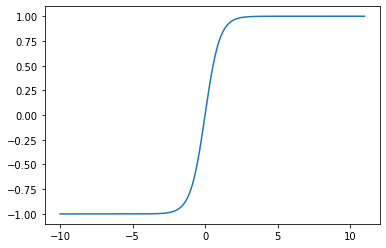

In [14]:
act = np.tanh
act(0.4)
r = np.arange(-10, 11, 0.01)
t = act(r)

import matplotlib.pyplot as plt
plt.plot(r, t)